# Exoplanet Classification Using Deep Neural Networks

## -- Neccessary modules 

In [1]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import preprocessing, model_selection
import numpy as np 
import pandas as pd 

## Loading Dataset from CSV (exoTrain.csv)

In [2]:
df = pd.read_csv('C:\\Users\\User1\\Desktop\\Exoplanet stars classifier\\exoTrain.csv')

In [3]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


## Lower part of dataset

In [4]:
df.tail()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,0,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55
5086,0,323.28,306.36,293.16,287.67,249.89,218.30,188.86,178.93,118.93,...,71.19,0.97,55.20,-1.63,-5.50,-25.33,-41.31,-16.72,-14.09,27.82


## Checking For NULL values

In [5]:
df.isnull().values.any()

False

## -- Converting Data into Numpy Arrays ( For Sake of Convenience)

In [16]:
x_train = np.array(df.drop(['LABEL'],1))
y_train = np.array(df['LABEL'], dtype ='float')
y_train.shape = (len(y_train),1)

## -- Scaling Data for Better Modelling (Only x values)

In [17]:
x_f_train = preprocessing.scale(x_train)
y_f_train = y_train

## -- Using DNN Model for Training Data 

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2,activation = tf.nn.softmax))


model.compile(optimizer = tf.train.AdamOptimizer(),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])

## -- Fitting Data into Model 

In [19]:
model.fit(x_f_train ,y_f_train , epochs = 30)

Epoch 1/30
5087/5087 [==============================] - 1s 212us/sample - loss: 0.0816 - acc: 0.9886
Epoch 2/30
5087/5087 [==============================] - 1s 200us/sample - loss: 0.0488 - acc: 0.9925
Epoch 3/30
5087/5087 [==============================] - 1s 199us/sample - loss: 0.0426 - acc: 0.9929
Epoch 4/30
5087/5087 [==============================] - 1s 197us/sample - loss: 0.0392 - acc: 0.9927
Epoch 5/30
5087/5087 [==============================] - 1s 198us/sample - loss: 0.0381 - acc: 0.9925
Epoch 6/30
5087/5087 [==============================] - 1s 201us/sample - loss: 0.0387 - acc: 0.9931
Epoch 7/30
5087/5087 [==============================] - 1s 201us/sample - loss: 0.0326 - acc: 0.9939
Epoch 8/30
5087/5087 [==============================] - 1s 204us/sample - loss: 0.0314 - acc: 0.9939
Epoch 9/30
5087/5087 [==============================] - 1s 198us/sample - loss: 0.0290 - acc: 0.9943
Epoch 10/30
5087/5087 [==============================] - 1s 200us/sample - loss: 0.0302 - a

## Loading Testing Dataset (from exoTest.csv)

In [20]:
df2 = pd.read_csv('C:\\Users\\User1\\Desktop\\Exoplanet stars classifier\\exoTest.csv')

In [21]:
df2.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,1,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,1,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,1,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


## -- Converting Data into Numpy Arrays 

In [22]:
x_test = np.array(df2.drop(['LABEL'],1))
y_test = np.array(df2['LABEL'], dtype ='float')
y_test.shape = (len(y_test),1)

## -- Scaling Data for Better Modelling (Only x values)

In [23]:
x_f_test = preprocessing.scale(x_test)
y_f_test = y_test

## -- Checking Trained Data For Overfitting and Underfitting over tested data

In [27]:
val_loss,val_acc = model.evaluate(x_f_test,y_f_test)
print("Loss % = {} , Accuracy % = {} ".format(val_loss*100,val_acc*100))

570/570 [==============================] - 0s 128us/sample - loss: 0.3683 - acc: 0.9825
Loss % = 36.83373945585468 , Accuracy % = 98.24561476707458 


## -- Predicting Star Type of Test Data from Trained Data 

In [28]:
# [1,0] -> Normal star   
# [0,1] -> Exoplanet star system

arr = np.array([[1,0],[0,1]])   

In [99]:
z = np.round(model.predict(x_f_test))

print('_____________________________________________________')
#print("Prediction : P-Class : O-Class ")

c1=c2=c3=c4=0

for i in range(0,len(z)):
    if np.array_equal(z[i],arr[0]):
        #print("{} : {} : {}".format(z[i],0,y_test[i]))
        c1+=1
    else:
        #print("{} : {} : {}".format(z[i],1,y_test[i]))
        c2+=1        


print('_____________________________________________________')
print("Predicted No of Normal Stars  = {}".format(c1))
print("Predicted NO. of Exoplanet stars = {}".format(c2))
print("Total tested stars = {}".format(len(z)))

m = y_f_test

print('_____________________________________________________')

for i in range(0,len(m)):
    if m[i] == 0:
        c3+=1
    else :
        c4+=1 
   

print("Original No of Normal Stars  = {}".format(c3))
print("Original No. of Exoplanet stars = {}".format(c4))
print("Total tested stars = {}".format(len(y_f_test)))

print('_____________________________________________________')
print('Accuracy = {}%'.format((c2/c4)*100))

_____________________________________________________
_____________________________________________________
Predicted No of Normal Stars  = 565
Predicted NO. of Exoplanet stars = 5
Total tested stars = 570
_____________________________________________________
Original No of Normal Stars  = 565
Original No. of Exoplanet stars = 5
Total tested stars = 570
_____________________________________________________
Accuracy = 100.0%


## Saving Trained data in a pickle for future use

In [100]:
import pickle

data = np.hstack((x_f_train,y_f_train))    # Merging the label column (y_test) with the X_test  i.e the total training set

with open("exoplanet_model.pickle","wb") as f:
    pickle.dump( data , f)

## Data Visualization

In [101]:
import seaborn as sns
from  scipy import ndimage

In [102]:
df3 = pd.read_csv('C:\\Users\\User1\\Desktop\\Exoplanet stars classifier\\exoTrain.csv')
df4 = pd.read_csv('C:\\Users\\User1\\Desktop\\Exoplanet stars classifier\\exoTest.csv')

In [103]:
df3.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [104]:
df4.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,1,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,1,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,1,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [105]:
df3 = df3.drop(['LABEL'],1)
df3.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [106]:
df3.shape

(5087, 3197)

In [107]:
df4 = df4.drop(['LABEL'],1)
df4.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


## Plotting Light Curve For Exoplanet Star System

## For Star 1

In [108]:
time = np.arange(3197)
flux = df4.iloc[0,:]

In [109]:
sns.set()

(0, 3197)

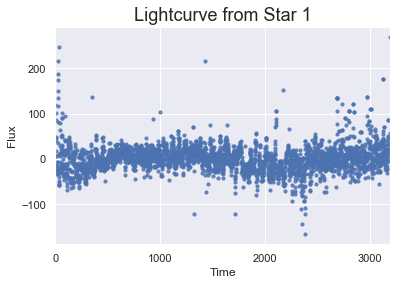

In [110]:
ax = sns.regplot(time, flux, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Lightcurve from Star 1")
ax.set_xlim(0, 3197)

## After Smoothening the graph 

In [111]:
smoothedFlux=ndimage.filters.gaussian_filter(flux, sigma=1)

In [112]:
print ("Without Gaussian Smoothing")
print ("Min: ", min(flux)) 
print ("Max: ", max(flux))
print ("Range: ", max(flux)-min(flux)) 

Without Gaussian Smoothing
Min:  -166.46
Max:  269.43
Range:  435.89


In [113]:
print ("With Gaussian Smoothing")
print ("Min: ", min(smoothedFlux)) 
print ("Max: ", max(smoothedFlux))
print ("Range: ", max(smoothedFlux)-min(smoothedFlux))

With Gaussian Smoothing
Min:  -115.5525312270284
Max:  197.80776078396866
Range:  313.36029201099706


(0, 3197)

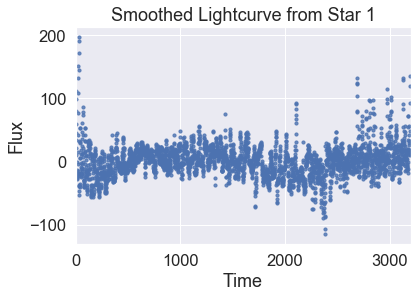

In [114]:
ax = sns.regplot(time, smoothedFlux, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Smoothed Lightcurve from Star 1")
ax.set_xlim(0, 3197)

In [115]:
verySmoothedFlux=ndimage.filters.gaussian_filter(flux, sigma=7)

(0, 3197)

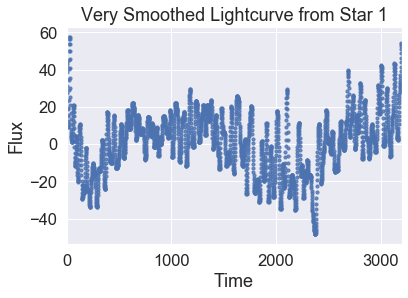

In [116]:
ax = sns.regplot(time, verySmoothedFlux, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Very Smoothed Lightcurve from Star 1")
ax.set_xlim(0, 3197)

## For 2nd star 

In [117]:
flux2 = df4.iloc[1,:]

smoothedFlux2 = ndimage.filters.gaussian_filter(flux2, sigma=1)

verySmoothedFlux2 = ndimage.filters.gaussian_filter(flux2, sigma=7)

(0, 3197)

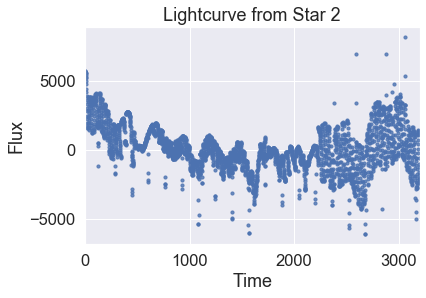

In [118]:
ax = sns.regplot(time, flux2, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Lightcurve from Star 2")
ax.set_xlim(0, 3197)

(0, 3197)

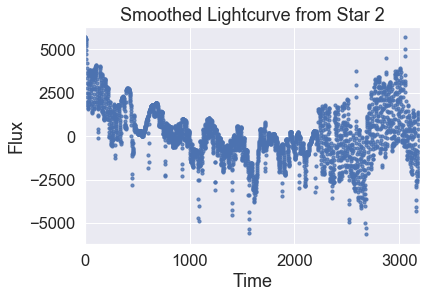

In [119]:
ax = sns.regplot(time, smoothedFlux2, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Smoothed Lightcurve from Star 2")
ax.set_xlim(0, 3197)

(0, 3197)

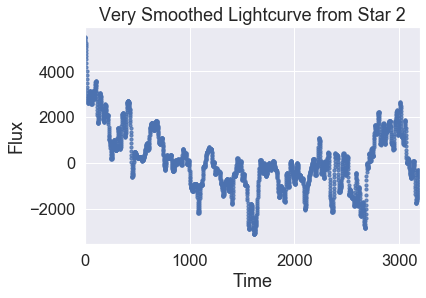

In [120]:
ax = sns.regplot(time, verySmoothedFlux2, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Very Smoothed Lightcurve from Star 2")
ax.set_xlim(0, 3197)

## For 3rd star

In [121]:
flux3 = df4.iloc[2,:]

smoothedFlux3 =ndimage.filters.gaussian_filter(flux3, sigma=1)

verySmoothedFlux3 =ndimage.filters.gaussian_filter(flux3, sigma=7)


(0, 3197)

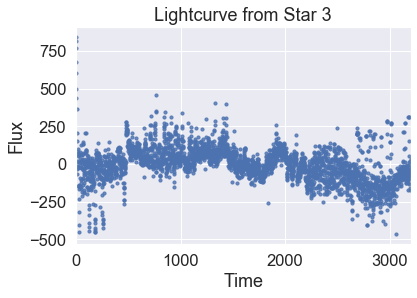

In [122]:
ax = sns.regplot(time, flux3, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Lightcurve from Star 3")
ax.set_xlim(0, 3197)

(0, 3197)

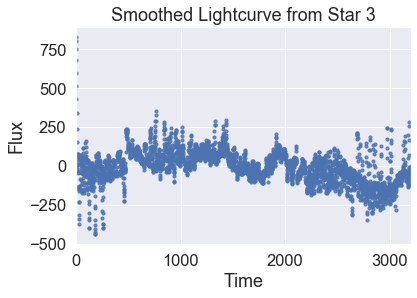

In [123]:
ax = sns.regplot(time, smoothedFlux3, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Smoothed Lightcurve from Star 3")
ax.set_xlim(0, 3197)

(0, 3197)

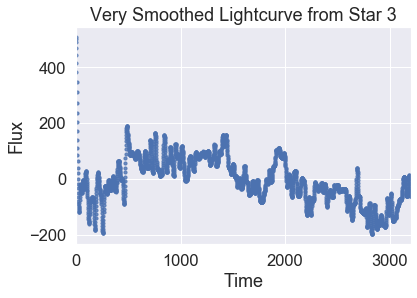

In [124]:
ax = sns.regplot(time, verySmoothedFlux3, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Very Smoothed Lightcurve from Star 3")
ax.set_xlim(0, 3197)

## For 4th Star

In [125]:
flux4 = df4.iloc[3,:]
smoothedFlux4=ndimage.filters.gaussian_filter(flux4, sigma=1)
verySmoothedFlux4=ndimage.filters.gaussian_filter(flux4, sigma=7)

(0, 3197)

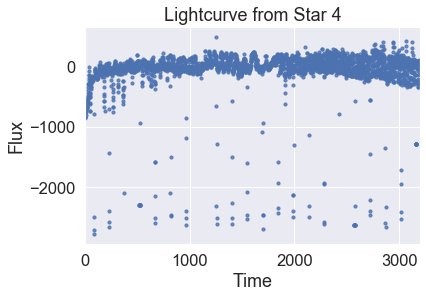

In [126]:
ax = sns.regplot(time, flux4, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Lightcurve from Star 4")
ax.set_xlim(0, 3197)

(0, 3197)

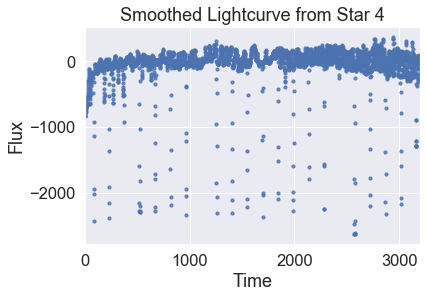

In [127]:
ax = sns.regplot(time, smoothedFlux4, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Smoothed Lightcurve from Star 4")
ax.set_xlim(0, 3197)

(0, 3197)

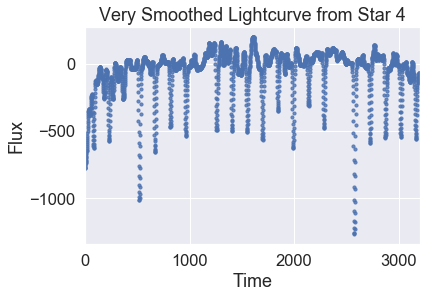

In [128]:
ax = sns.regplot(time, verySmoothedFlux4, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Very Smoothed Lightcurve from Star 4")
ax.set_xlim(0, 3197)

## For 5th Star

In [129]:
flux5 = df4.iloc[4,:]
smoothedFlux5=ndimage.filters.gaussian_filter(flux5, sigma=1)
verySmoothedFlux5=ndimage.filters.gaussian_filter(flux5, sigma=7)

(0, 3197)

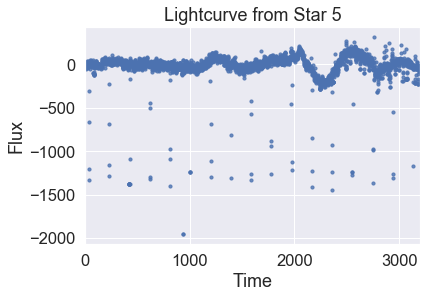

In [130]:
ax = sns.regplot(time, flux5, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Lightcurve from Star 5")
ax.set_xlim(0, 3197)

(0, 3197)

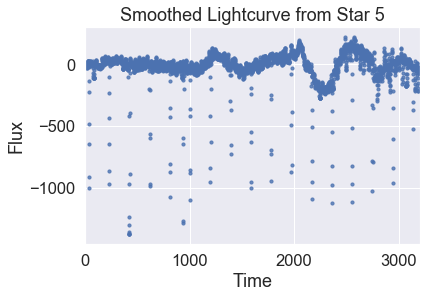

In [131]:
ax = sns.regplot(time, smoothedFlux5, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Smoothed Lightcurve from Star 5")
ax.set_xlim(0, 3197)

(0, 3197)

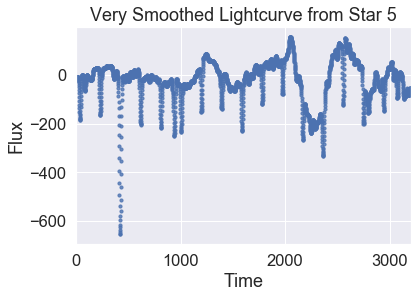

In [132]:
ax = sns.regplot(time, verySmoothedFlux5, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Very Smoothed Lightcurve from Star 5")
ax.set_xlim(0, 3197)

## Plotting Light Curve for Non-Exoplanet Star System

In [133]:
flux6 = df4.iloc[5,:]
flux7 = df4.iloc[6,:]

smoothedFlux6=ndimage.filters.gaussian_filter(flux6, sigma=1)
smoothedFlux7=ndimage.filters.gaussian_filter(flux7, sigma=1)

verySmoothedFlux6=ndimage.filters.gaussian_filter(flux6, sigma=7)
verySmoothedFlux7=ndimage.filters.gaussian_filter(flux7, sigma=7)

## For 6th star

(0, 3197)

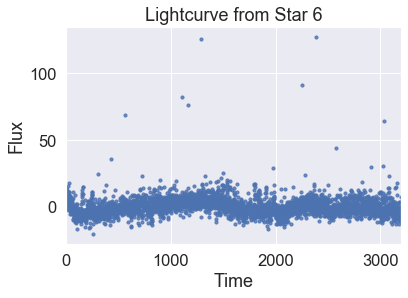

In [134]:
ax = sns.regplot(time, flux6, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Lightcurve from Star 6")
ax.set_xlim(0, 3197)

(0, 3197)

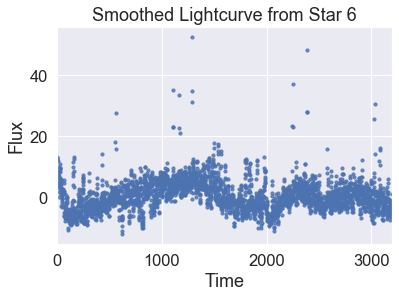

In [135]:
ax = sns.regplot(time, smoothedFlux6, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Smoothed Lightcurve from Star 6")
ax.set_xlim(0, 3197)

(0, 3197)

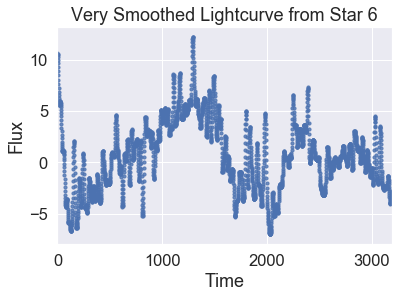

In [136]:
ax = sns.regplot(time, verySmoothedFlux6, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Very Smoothed Lightcurve from Star 6")
ax.set_xlim(0, 3197)

## For Star 200

(0, 3197)

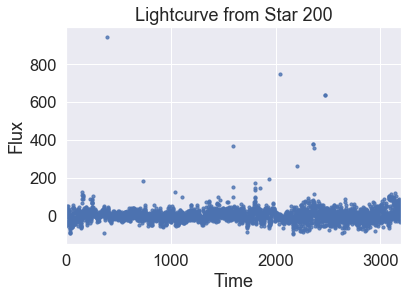

In [137]:
ax = sns.regplot(time, flux200, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Lightcurve from Star 200")
ax.set_xlim(0, 3197)

(0, 3197)

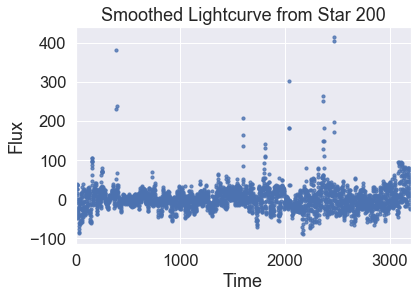

In [138]:
ax = sns.regplot(time, smoothedFlux200, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Smoothed Lightcurve from Star 200")
ax.set_xlim(0, 3197)

(0, 3197)

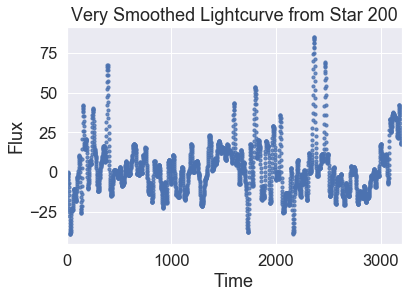

In [139]:
ax = sns.regplot(time, verySmoothedFlux200, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Very Smoothed Lightcurve from Star 200")
ax.set_xlim(0, 3197)

## Similarly for Star 201

(0, 3197)

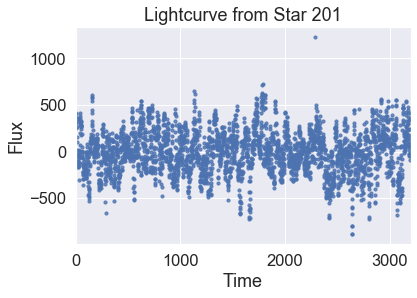

In [140]:
ax = sns.regplot(time, flux201, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Lightcurve from Star 201")
ax.set_xlim(0, 3197)

(0, 3197)

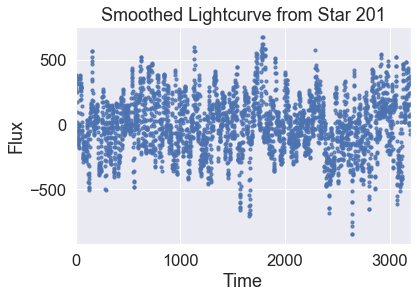

In [141]:
ax = sns.regplot(time, smoothedFlux201, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Smoothed Lightcurve from Star 201")
ax.set_xlim(0, 3197)

(0, 3197)

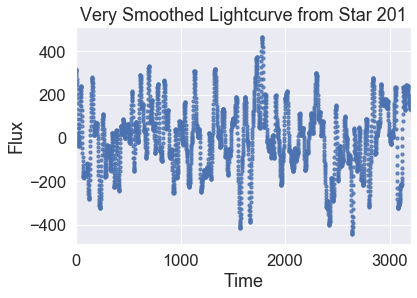

In [142]:
ax = sns.regplot(time, verySmoothedFlux201, fit_reg=False, scatter_kws={"s": 10})
sns.set(font_scale=1.5)
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Very Smoothed Lightcurve from Star 201")
ax.set_xlim(0, 3197)

In [143]:
print ("Without Gaussian Smoothing")
print ("Min: ", min(flux201)) 
print ("Max: ", max(flux201))
print ("Range: ", max(flux201)-min(flux201))

Without Gaussian Smoothing
Min:  -889.01
Max:  1231.59
Range:  2120.6


In [144]:
print ("With Some Gaussian Smoothing")
print ("Min: ", min(smoothedFlux201)) 
print ("Max: ", max(smoothedFlux201))
print ("Range: ", max(smoothedFlux201)-min(smoothedFlux201))

With Some Gaussian Smoothing
Min:  -845.8729539383663
Max:  675.8332202521622
Range:  1521.7061741905286


In [145]:
print ("With Heavy Gaussian Smoothing")
print ("Min: ", min(verySmoothedFlux201)) 
print ("Max: ", max(verySmoothedFlux201))
print ("Range: ", max(verySmoothedFlux201)-min(verySmoothedFlux201))

With Heavy Gaussian Smoothing
Min:  -445.1960547467082
Max:  467.329323984805
Range:  912.5253787315132
